# Data Importing

In [1]:
import pandas as pd  
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('D:\Drug\Drugdata.tsv', sep='\t')
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [4]:
null_counts = data.isnull().sum()
print(null_counts)

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [5]:
# Remove unnecessary columns

df = data[['drugName', 'condition', 'review', 'rating']]

# Handle missing data if needed

df.dropna(inplace=True)
df


,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0
...,...,...,...,...
161292,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0
161293,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0
161294,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0
161295,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0


In [6]:
# Check the distribution of conditions
condition_counts = df['condition'].value_counts()
print("Distribution of Conditions:")
print(condition_counts)

Distribution of Conditions:
condition
Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: count, Length: 884, dtype: int64


# Data Preprocessing / Text Mining

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [8]:
# Convert text to lowercase
df['review'] = df['review'].str.lower()

In [9]:
# Remove special characters and numbers
df['review'] = df['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [10]:
# Tokenization
df['review'] = df['review'].apply(lambda x: word_tokenize(x))

In [11]:
# Remove stop words
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: [word for word in x if word not in stop_words])

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
#import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [14]:
df['review'][5]

['nd',
 'day',
 'mg',
 'started',
 'work',
 'rock',
 'hard',
 'erection',
 'however',
 'experianced',
 'headache',
 'lower',
 'bowel',
 'preassure',
 'rd',
 'day',
 'erection',
 'would',
 'wake',
 'amp',
 'hurt',
 'legankles',
 'ache',
 'severe',
 'lower',
 'bowel',
 'preassure',
 'like',
 'need',
 'go',
 'cant',
 'enjoyed',
 'initial',
 'rockhard',
 'erection',
 'side',
 'effect',
 'month',
 'supply',
 'im',
 'amp',
 'work',
 'x',
 'week',
 'worth',
 'side',
 'effect']

In [15]:
# Join tokens back into sentences
df['review'] = df['review'].apply(lambda x: ' '.join(x))

In [16]:
df

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,side effect take combination bystolic mg fish oil,9.0
1,Guanfacine,ADHD,son halfway fourth week intuniv became concern...,8.0
2,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5.0
3,Ortho Evra,Birth Control,first time using form birth control im glad we...,8.0
4,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9.0
...,...,...,...,...
161292,Campral,Alcohol Dependence,wrote first report midoctober alcohol since po...,10.0
161293,Metoclopramide,Nausea/Vomiting,given iv surgey immediately became anxious cou...,1.0
161294,Orencia,Rheumatoid Arthritis,limited improvement month developed bad rash m...,2.0
161295,Thyroid desiccated,Underactive Thyroid,ive thyroid medication year spent first synthr...,10.0


# Data Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

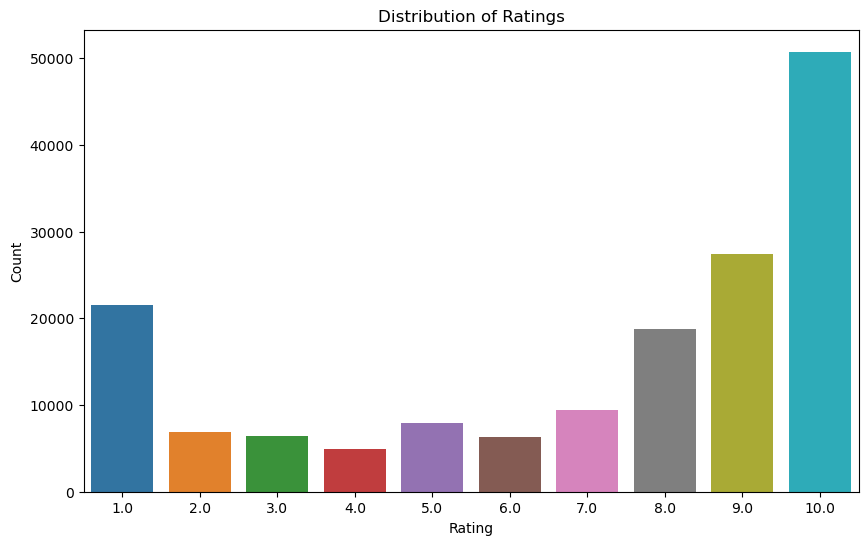

In [18]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

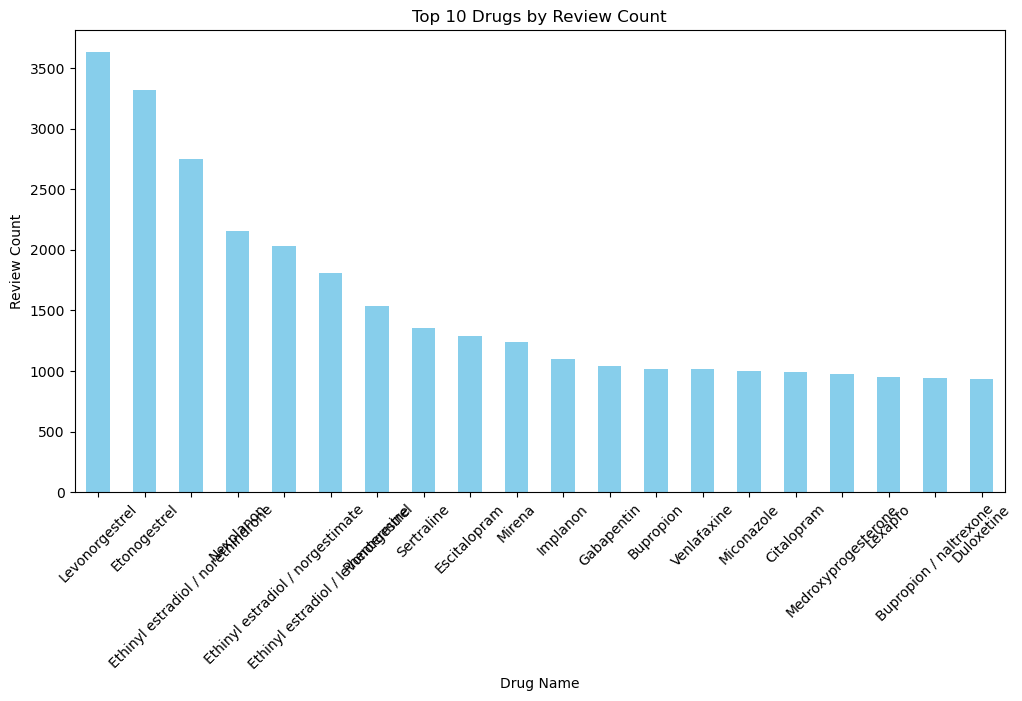

In [19]:
# Top 10 Drugs by Review Count
top_drugs = df['drugName'].value_counts().nlargest(20)
plt.figure(figsize=(12, 6))
top_drugs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Drugs by Review Count')
plt.xlabel('Drug Name')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

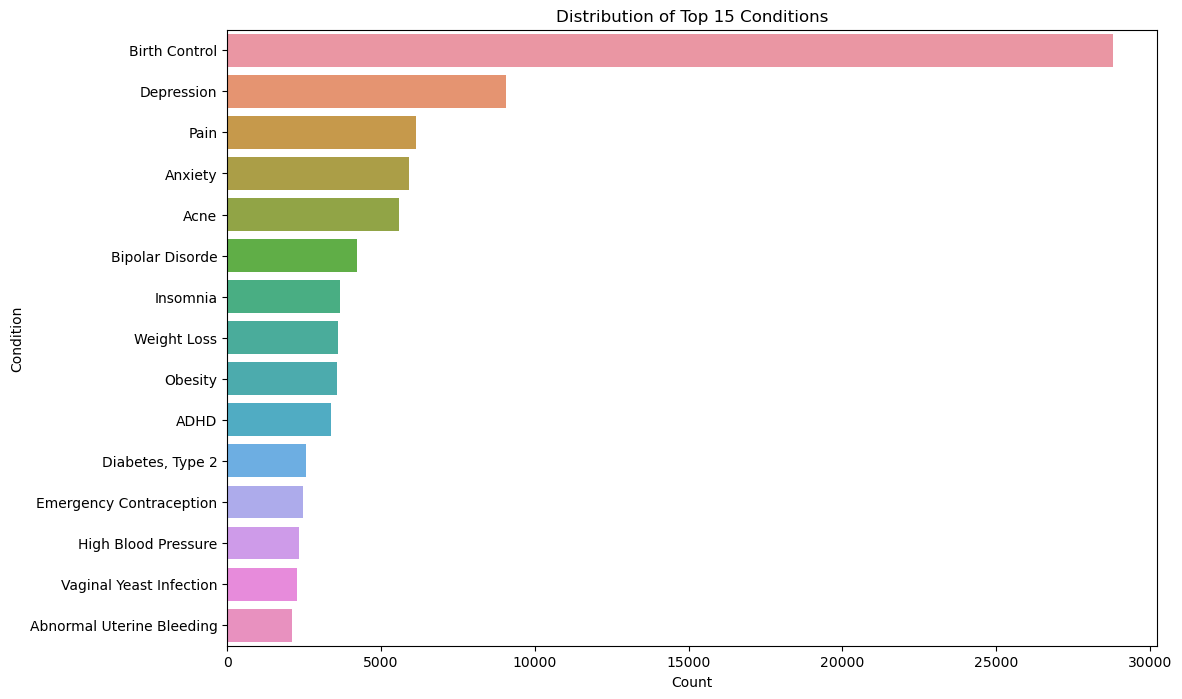

In [20]:
# Distribution of Conditions
plt.figure(figsize=(12, 8))
sns.countplot(y='condition', data=df, order=df['condition'].value_counts().index[:15])
plt.title('Distribution of Top 15 Conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

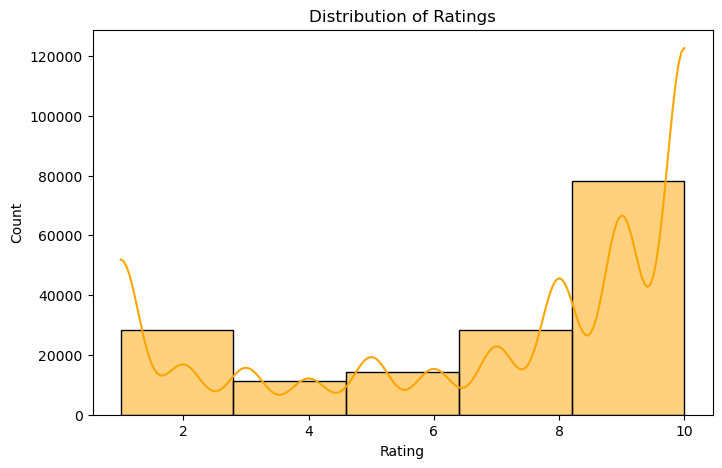

In [21]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=True, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

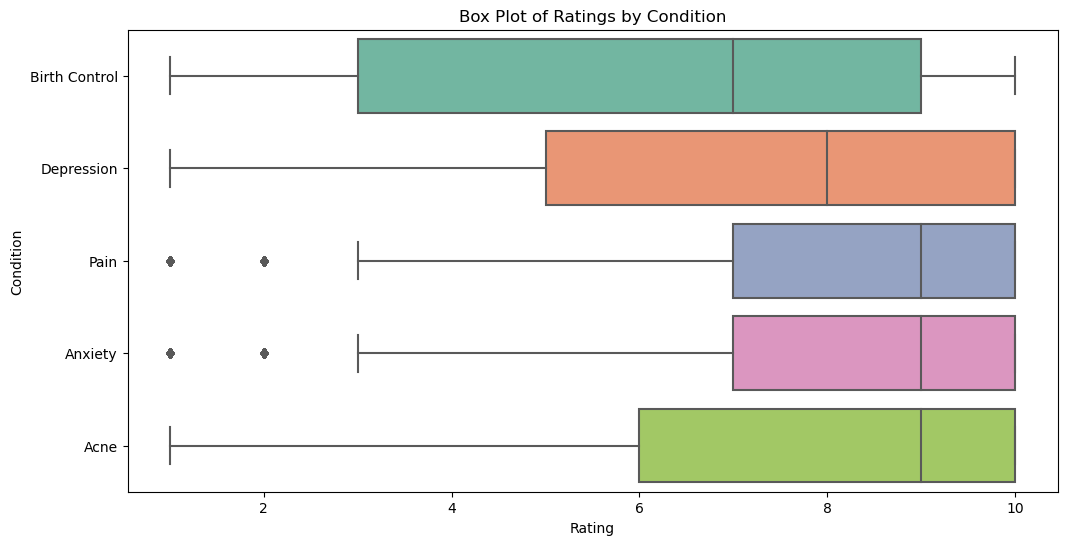

In [22]:
# Plot box plots of ratings for top conditions
top_conditions = condition_counts.head(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='condition', data=df, order=top_conditions, palette='Set2')
plt.title('Box Plot of Ratings by Condition')
plt.xlabel('Rating')
plt.ylabel('Condition')
plt.show()

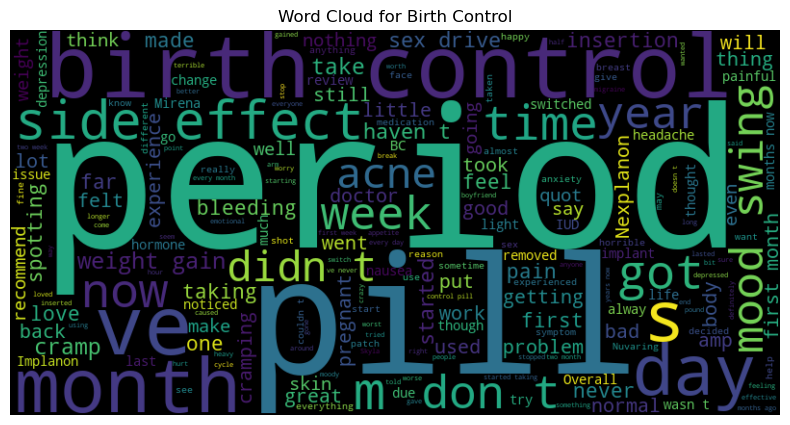

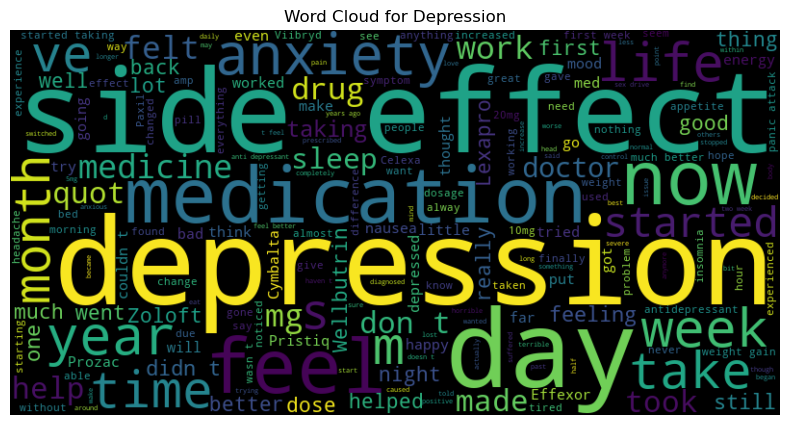

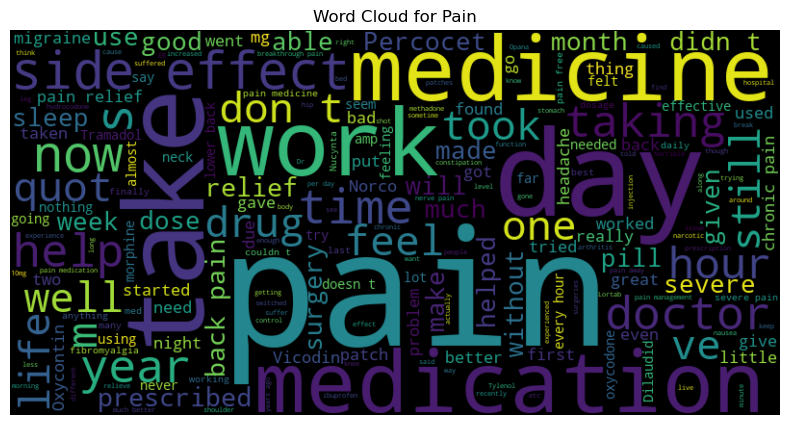

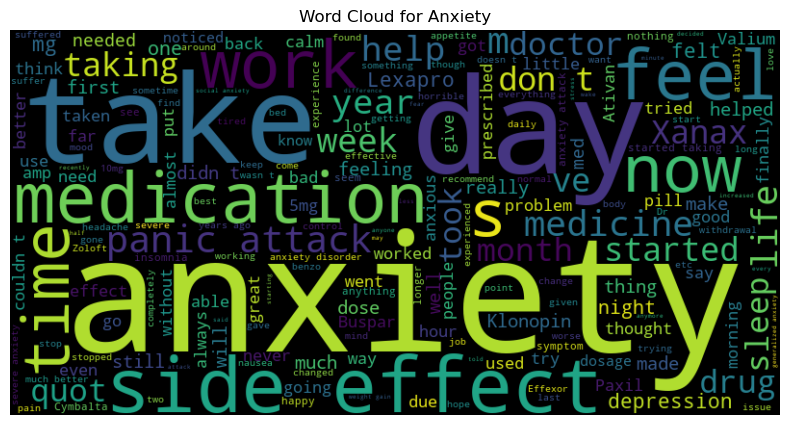

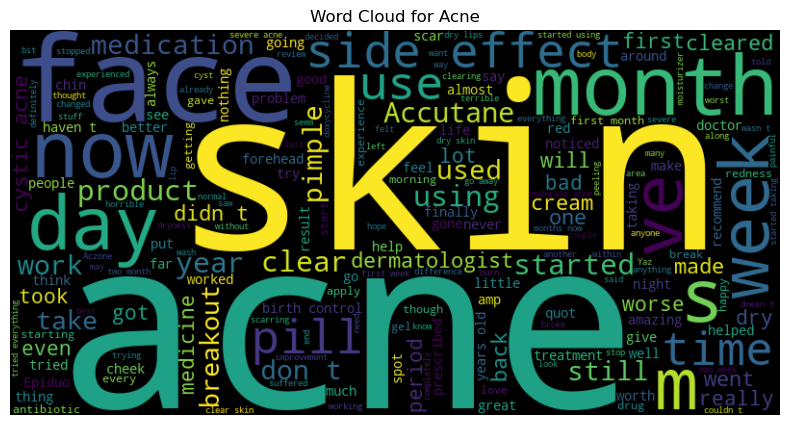

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_top_conditions with columns 'condition' and 'review'
df_top_conditions = pd.read_csv('D:\Drug\Drugdata.tsv', sep='\t')
top_conditions = condition_counts.head(5).index
df_top_conditions = df_top_conditions[df_top_conditions['condition'].isin(top_conditions)]

# Combine all reviews for each condition
condition_reviews = {}
for condition in top_conditions:
    reviews = " ".join(df_top_conditions[df_top_conditions['condition'] == condition]['review'])
    condition_reviews[condition] = reviews

# Generate and display word clouds
for condition, reviews in condition_reviews.items():
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(reviews)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {condition}')
    plt.axis('off')
    plt.show()

# EDA

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [25]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(df['review'])
y = df['condition']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
# Additional: Check class distribution in test set
test_condition_counts = pd.Series(y_test).value_counts()
print("Distribution of Conditions in Test Set:")
print(test_condition_counts)

Distribution of Conditions in Test Set:
condition
Birth Control                 5755
Depression                    1818
Pain                          1252
Anxiety                       1200
Acne                          1099
                              ... 
Anemia, Sickle Cell              1
Thrombocytopenia                 1
Women (oxybutynin)               1
Mononucleosis                    1
amilial Mediterranean Feve       1
Name: count, Length: 632, dtype: int64


In [29]:
# Filter the data to include only reviews related to the first 15 most common conditions
top_conditions = condition_counts.head(15).index
df_top_conditions = df[df['condition'].isin(top_conditions)]
top_conditions

Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
       'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD',
       'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure',
       'Vaginal Yeast Infection', 'Abnormal Uterine Bleeding'],
      dtype='object', name='condition')

In [31]:
# Step 4: Split the data into training and testing sets
X_top_conditions = tfidf_vectorizer.transform(df_top_conditions['review'])
y_top_conditions = df_top_conditions['condition']
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_conditions, y_top_conditions, test_size=0.2, random_state=42)

In [31]:
model_top_conditions = MultinomialNB()
model_top_conditions.fit(X_train_top, y_train_top)

MultinomialNB()

In [32]:
# Step 5: Choose and train the models

# Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_top, y_train_top)

MultinomialNB()

In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_top, y_train_top)

RandomForestClassifier(random_state=42)

In [34]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(X_train_top, y_train_top)

SVC(C=1, kernel='linear')

In [35]:
# Step 6: Make predictions and evaluate the model
y_pred_top_conditions = model_top_conditions.predict(X_test_top)

# Evaluate accuracy
accuracy_top_conditions = accuracy_score(y_test_top, y_pred_top_conditions)
print(f'Accuracy on Top 10 Conditions: {accuracy_top_conditions:.2f}')

# Display classification report
print(classification_report(y_test_top, y_pred_top_conditions))

Accuracy on Top 10 Conditions: 0.81
                           precision    recall  f1-score   support

                     ADHD       0.96      0.75      0.84       657
Abnormal Uterine Bleeding       0.71      0.04      0.08       376
                     Acne       0.95      0.80      0.87      1081
                  Anxiety       0.79      0.57      0.66      1190
          Bipolar Disorde       0.92      0.54      0.68       882
            Birth Control       0.82      0.99      0.90      5807
               Depression       0.59      0.85      0.70      1804
         Diabetes, Type 2       0.95      0.78      0.85       497
  Emergency Contraception       1.00      0.82      0.90       532
      High Blood Pressure       0.91      0.70      0.79       451
                 Insomnia       0.87      0.72      0.79       707
                  Obesity       0.65      0.57      0.61       687
                     Pain       0.90      0.86      0.88      1289
  Vaginal Yeast Infection

In [36]:
# Naive Bayes
y_pred_nb = model_nb.predict(X_test_top)
accuracy_nb = accuracy_score(y_test_top, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb:.2f}')
print(classification_report(y_test_top, y_pred_nb))

Accuracy (Naive Bayes): 0.81
                           precision    recall  f1-score   support

                     ADHD       0.96      0.75      0.84       657
Abnormal Uterine Bleeding       0.71      0.04      0.08       376
                     Acne       0.95      0.80      0.87      1081
                  Anxiety       0.79      0.57      0.66      1190
          Bipolar Disorde       0.92      0.54      0.68       882
            Birth Control       0.82      0.99      0.90      5807
               Depression       0.59      0.85      0.70      1804
         Diabetes, Type 2       0.95      0.78      0.85       497
  Emergency Contraception       1.00      0.82      0.90       532
      High Blood Pressure       0.91      0.70      0.79       451
                 Insomnia       0.87      0.72      0.79       707
                  Obesity       0.65      0.57      0.61       687
                     Pain       0.90      0.86      0.88      1289
  Vaginal Yeast Infection       

In [37]:
# Random Forest
y_pred_rf = model_rf.predict(X_test_top)
accuracy_rf = accuracy_score(y_test_top, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf:.2f}')
print(classification_report(y_test_top, y_pred_rf))

Accuracy (Random Forest): 0.89
                           precision    recall  f1-score   support

                     ADHD       0.93      0.89      0.91       657
Abnormal Uterine Bleeding       0.99      0.57      0.73       376
                     Acne       0.96      0.91      0.93      1081
                  Anxiety       0.83      0.79      0.81      1190
          Bipolar Disorde       0.91      0.77      0.83       882
            Birth Control       0.92      0.99      0.96      5807
               Depression       0.78      0.86      0.82      1804
         Diabetes, Type 2       0.94      0.86      0.90       497
  Emergency Contraception       0.99      0.94      0.96       532
      High Blood Pressure       0.89      0.78      0.83       451
                 Insomnia       0.84      0.83      0.83       707
                  Obesity       0.81      0.72      0.77       687
                     Pain       0.89      0.92      0.90      1289
  Vaginal Yeast Infection     

In [38]:
# SVM
y_pred_svm = model_svm.predict(X_test_top)
accuracy_svm = accuracy_score(y_test_top, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm:.2f}')
print(classification_report(y_test_top, y_pred_svm))

Accuracy (SVM): 0.86
                           precision    recall  f1-score   support

                     ADHD       0.93      0.85      0.89       657
Abnormal Uterine Bleeding       0.71      0.33      0.45       376
                     Acne       0.95      0.87      0.91      1081
                  Anxiety       0.76      0.75      0.75      1190
          Bipolar Disorde       0.84      0.73      0.78       882
            Birth Control       0.93      0.97      0.95      5807
               Depression       0.72      0.81      0.77      1804
         Diabetes, Type 2       0.89      0.87      0.88       497
  Emergency Contraception       1.00      0.97      0.98       532
      High Blood Pressure       0.85      0.83      0.84       451
                 Insomnia       0.84      0.83      0.83       707
                  Obesity       0.68      0.64      0.66       687
                     Pain       0.89      0.93      0.91      1289
  Vaginal Yeast Infection       0.98    